# Data Wrangling

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib  inline 

#from library.sb_utils import save_file

# The Goal:

**The project was designed to predict Used cars depreciation per year.**

**Datasets:**
Two datasets gathered to analize Used cars depreciation.

In [2]:
# The dataset is scrapped from Kelly Blue Burge websites - Download the dataset
df_kb = pd.read_csv('result.csv')
df_kb[:5]

,Unnamed: 0,title,price,mpg,rating
0,0,2020 Acura ILX,"$26,925",28 MPG,4.4 / 5
1,1,2020 Acura RLX,"$55,925",23 MPG,4.0 / 5
2,2,2020 Acura RLX Sport Hybrid,"$62,925",28 MPG,4.0 / 5
3,3,2021 Acura TLX,"$38,525",25 MPG,4.7 / 5
4,4,2020 Acura MDX,"$45,525",23 MPG,4.6 / 5


In [3]:
# Overview the dataframe
df_kb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  715 non-null    int64 
 1   title       715 non-null    object
 2   price       715 non-null    object
 3   mpg         715 non-null    object
 4   rating      577 non-null    object
dtypes: int64(1), object(4)
memory usage: 28.1+ KB


In [4]:
# The dimension of the dataframe
df_kb.shape

(715, 5)

In [5]:
# Use pd_to_numeric() method to change string number to float and non numeric value to NAN
df_kb['mpg'] = df_kb['mpg'].apply(lambda x : x.replace('MPG', ''))
df_kb['mpg'] = pd.to_numeric(df_kb['mpg'], errors='coerce')
#df_kb['rating']= pd.to_numeric(df_kb['rating'], errors='coerce')

In [6]:
# mpg and rating data type casted to float
df_kb.dtypes

Unnamed: 0      int64
title          object
price          object
mpg           float64
rating         object
dtype: object

In [7]:

df_kb['title']

0                   2020 Acura ILX
1                   2020 Acura RLX
2      2020 Acura RLX Sport Hybrid
3                   2021 Acura TLX
4                   2020 Acura MDX
                  ...             
710                 2021 Acura TLX
711    2020 Acura MDX Sport Hybrid
712                 2020 Acura NSX
713    2020 Acura RLX Sport Hybrid
714                 2020 Acura NSX
Name: title, Length: 715, dtype: object

In [8]:
# Characters removed from price, and casted datatype from 'object' to 'float'
df_kb['price'] = df_kb['price'].apply(lambda x: x.replace('$', "").replace(',','')).astype('float')


In [9]:
# Removed the 'Unnamed : 0' column from the dataframe
del df_kb['Unnamed: 0']
df_kb.head()

,title,price,mpg,rating
0,2020 Acura ILX,26925.0,28.0,4.4 / 5
1,2020 Acura RLX,55925.0,23.0,4.0 / 5
2,2020 Acura RLX Sport Hybrid,62925.0,28.0,4.0 / 5
3,2021 Acura TLX,38525.0,25.0,4.7 / 5
4,2020 Acura MDX,45525.0,23.0,4.6 / 5


In [10]:
# 'Unnamed' columns removed and price data type changed from string to float

In [11]:
df_kb.shape

(715, 4)

In [12]:
# Remove duplicate titles
df_kb['title'] = df_kb['title'].drop_duplicates(keep='first')

In [13]:
# Title is composed of year, manufacture and model there in no complete duplicated rows. check dimension is equal
# after and before applying a drop_dupplicated method
df_kb.shape

(715, 4)

In [14]:
df_kb.head()

,title,price,mpg,rating
0,2020 Acura ILX,26925.0,28.0,4.4 / 5
1,2020 Acura RLX,55925.0,23.0,4.0 / 5
2,2020 Acura RLX Sport Hybrid,62925.0,28.0,4.0 / 5
3,2021 Acura TLX,38525.0,25.0,4.7 / 5
4,2020 Acura MDX,45525.0,23.0,4.6 / 5


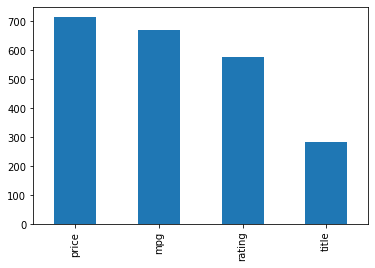

In [15]:
# None missing values bar graph 
df_kb.notna().sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [16]:
# Remove the entire row to any value is NAN using dropna method
df_kb = df_kb.dropna()
df_kb.shape

(214, 4)

In [17]:
# View the last 5 value of title column
df_kb['title'].dropna()[-5:]

648      2020 Buick Enclave
649       2021 Buick Encore
650    2021 Buick Encore GX
651     2021 Buick Envision
655      2019 Buick Cascada
Name: title, dtype: object

In [18]:
# Dataframe reduced from 715 rows to 214 after the NaN values stripped.
df_kb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 655
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   214 non-null    object 
 1   price   214 non-null    float64
 2   mpg     214 non-null    float64
 3   rating  214 non-null    object 
dtypes: float64(2), object(2)
memory usage: 8.4+ KB


In [19]:
# Apply split method to extract year feature from the title variable using apply() method, 
# cast the datatype to int
df_kb['year'] = df_kb['title'].apply(lambda x: x.split()[0]).astype('float64')

In [20]:
# Check the value of year variable
df_kb['year'][0:5]

0    2020.0
1    2020.0
2    2020.0
3    2021.0
4    2020.0
Name: year, dtype: float64

In [21]:
# Assign the second index of 'title'vaiable to manufacturer feature
df_kb['manufacturer'] = df_kb['title'].apply(lambda x: x.split()[1].lower())
df_kb['manufacturer'][1:5]

1    acura
2    acura
3    acura
4    acura
Name: manufacturer, dtype: object

In [22]:
#Assign the splitted value of title index from 2 and above to model variable
df_kb['model'] = df_kb['title'].apply(lambda x: x.split()[2:])
df_kb['model'][:5]

0                   [ILX]
1                   [RLX]
2    [RLX, Sport, Hybrid]
3                   [TLX]
4                   [MDX]
Name: model, dtype: object

In [23]:
# model variable return values with square braketes and commas.

In [24]:
# Remove the square brakets,commas and lower the cases.Casting the list to string and apply chain method
df_kb['model'] = df_kb['model'].apply(lambda x: str(x).replace('[','').replace(']', '').replace("'", '')
                                        .replace(',', '').lower())
df_kb.model.head()

0                 ilx
1                 rlx
2    rlx sport hybrid
3                 tlx
4                 mdx
Name: model, dtype: object

In [25]:
# Overview the model feature cleaned from non-alphanumeric characters
df_kb['model']= df_kb['model'].astype('object')
df_kb['model'][1:5]

1                 rlx
2    rlx sport hybrid
3                 tlx
4                 mdx
Name: model, dtype: object

In [26]:
# Drop the already extracted title features from the dataframe
df_kbb = df_kb.drop(columns=['title'], axis=1)
df_kbb.head()

,price,mpg,rating,year,manufacturer,model
0,26925.0,28.0,4.4 / 5,2020.0,acura,ilx
1,55925.0,23.0,4.0 / 5,2020.0,acura,rlx
2,62925.0,28.0,4.0 / 5,2020.0,acura,rlx sport hybrid
3,38525.0,25.0,4.7 / 5,2021.0,acura,tlx
4,45525.0,23.0,4.6 / 5,2020.0,acura,mdx


In [27]:
df_kbb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 655
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         214 non-null    float64
 1   mpg           214 non-null    float64
 2   rating        214 non-null    object 
 3   year          214 non-null    float64
 4   manufacturer  214 non-null    object 
 5   model         214 non-null    object 
dtypes: float64(3), object(3)
memory usage: 11.7+ KB


In [28]:
# Additioanl features extract from 'title' column inot 'year', 'manufacturer', 'model' , the info( ) return
# the shape and the data type of the extract features.

In [29]:
index = df_kbb['model'].duplicated()
df_kbb['model'][index]

58     crosstrek
88         rogue
251        civic
631       malibu
Name: model, dtype: object

The model 'crosstrek', 'rogue','civic', 'malibu' have duplicated values

**Downlaod the second Kaggle vehicles dataset**

In [30]:
# Download the vehicles dataset 
df = pd.read_csv('vehicles.csv')
# Read the first five elements
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [31]:
# Dimension of dataframe
df.shape

(423857, 25)

In [32]:
# Select the undesired feetures and drop from dataframe
df1 = df.drop(['id', 'url', 'region', 'region_url', 'vin','image_url', 'description', 'county', 'state', 'lat',
                'long'], axis = 1)
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white


In [33]:
# Dimension after features dropped 
df1.shape

(423857, 14)

In [34]:
# Overview the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         423857 non-null  int64  
 1   year          328743 non-null  float64
 2   manufacturer  313242 non-null  object 
 3   model         325384 non-null  object 
 4   condition     176719 non-null  object 
 5   cylinders     197679 non-null  object 
 6   fuel          327214 non-null  object 
 7   odometer      270585 non-null  float64
 8   title_status  327759 non-null  object 
 9   transmission  328065 non-null  object 
 10  drive         231119 non-null  object 
 11  size          102627 non-null  object 
 12  type          241157 non-null  object 
 13  paint_color   222203 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.3+ MB


In [35]:
# Convert Price featuers datatype from discret 'int' type to continuous 'float'
df1['price'] = df1['price'].astype('float')
df1.dtypes

price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
dtype: object

In [36]:
# kbb vehicles year-make range difference
df_kbb.year.value_counts()

2020.0    117
2021.0     62
2019.0     35
Name: year, dtype: int64

In [37]:
# Unique number of df_kbb dataframe 
df_kbb['manufacturer'].unique()

array(['acura', 'volvo', 'subaru', 'nissan', 'mini', 'maserati', 'lexus',
       'infiniti', 'honda', 'genesis', 'ford', 'chrysler', 'cadillac',
       'bmw', 'audi', 'volkswagen', 'porsche', 'mitsubishi', 'mazda',
       'lincoln', 'land', 'kia', 'jaguar', 'hyundai', 'fiat', 'dodge',
       'chevrolet', 'buick'], dtype=object)

In [38]:
# Type of manufacturer in df_kbb  dataframe 
df1.manufacturer.unique()

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [39]:
# Number of manufacturer in df_kbb
df_kbb['manufacturer'].nunique()

28

In [40]:
# Overview the difference in manufacturer from the two datasets provided
dif = set(df_kbb['manufacturer']) - set(df1['manufacturer'])
print(len(dif),',',dif)

4 , {'genesis', 'maserati', 'porsche', 'land'}


In [41]:
# check the first five model values  
df1['model'].head()

0          new sierra 1500
1                   sonata
2                    prius
3                   lancer
4    sierra classic 2500hd
Name: model, dtype: object

In [42]:
# Wrangling the data by replacing and label with matching name using apply method in pandas Series
df_kbb['manufacturer']= df_kbb['manufacturer'].apply(lambda x: x.replace('land','land rover'))
df_kbb['manufacturer']= df_kbb['manufacturer'].apply(lambda x: x.replace('aston', 'aston-martin'))
df_kbb['manufacturer'] = df_kbb['manufacturer'].apply(lambda x: x.replace('porsche','porche'))

In [43]:
#Overview the difference of manufacturer from the two datasets provided
dif = set(df_kbb['manufacturer']) - set(df1['manufacturer'])
print(len(dif),',',dif)

2 , {'genesis', 'maserati'}


In [44]:
# The Number of unique model in 'df_kbb'
df_kbb['model'].nunique()

210

<AxesSubplot:>

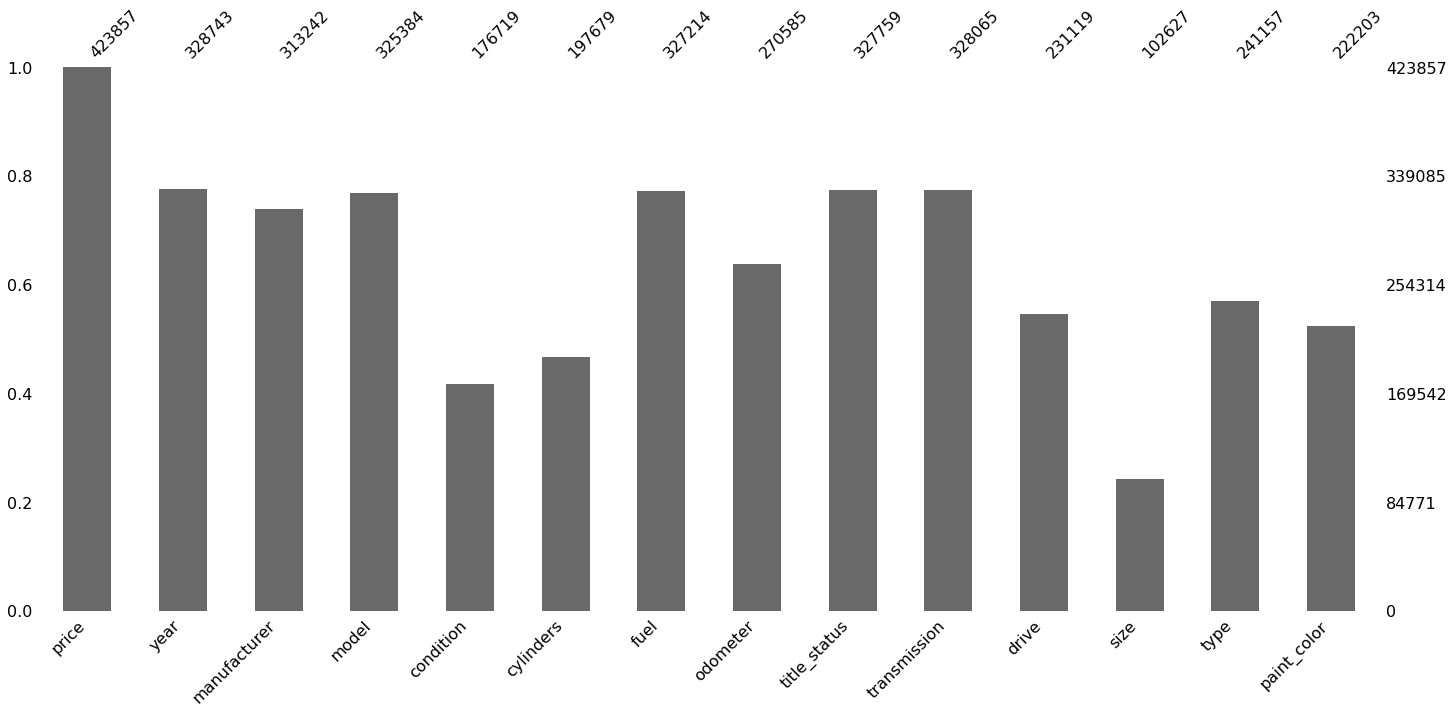

In [45]:
# The bar graph shows the overview of not-null values and get insight the degree of missing values.
import missingno as msno
msno.bar(df1)

In [46]:
# The car model difference beteewent the two dataframes.
diff = set(df_kbb['model']) - set(df1['model'])
len(diff)

27

In [47]:
# The list of 56 models of kbb not found in model 'df_1' dataset
diff = set(df_kbb['model']) - (set(df1['model']))
diff

{'500c abarth',
 '718 cayman',
 '718 spyder',
 'a6 allroad',
 'arteon',
 'atlas cross sport',
 'cayenne coupe',
 'cr-v hybrid',
 'fusion plug-in hybrid',
 'g70',
 'g80',
 'ghibli',
 'gv80',
 'levante',
 'mdx sport hybrid',
 'niro plug-in hybrid',
 'rover defender 110',
 'rover discovery',
 'rover discovery sport',
 'rover range rover',
 'rover range rover evoque',
 'rover range rover sport',
 'rover range rover velar',
 'seltos',
 'ux',
 'v90',
 'venue'}

In [48]:
#Top ten highest frequency of model in df_kbb dataframe
df_kbb[['model']].value_counts()[0:10]


model    
crosstrek    2
rogue        2
malibu       2
civic        2
encore gx    1
forte        1
forester     1
flex         1
fit          1
fiesta       1
dtype: int64

In [49]:
#Remove slight model name difference and match names to keep consistency

df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('500c abarth', '500c'))
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('718 cayman', 'cayenne'))
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('8 series', '7-series'))
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('911', 'carrera 911 pdk coupe'))
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('a6 allroad', 'allroad'))
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace(
                                                'atlas cross sport', 'jetta sportwagen'))                                                               
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('cayenne coupe','cayenne'))                                                               
df_kbb['model']= df_kbb['model'].apply(lambda x:
                                                x.replace('clarity electric','clarity plug-in hybrid')) 
df_kbb['model']= df_kbb['model'].apply(lambda x: x.replace('cr-v hybrid', 'cr-v'))
                                                        
                                                                                      

In [50]:
#Remove slight model name difference and match names to keep consistency

df_kbb['model'] = df_kbb['model'].apply(lambda x:
                                                x.replace('fusion plug-in hybrid', 'fusion hybrid'))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('i-pace', 'f-pace'))
df_kbb['model'] = df_kbb['model'].apply(lambda x:
                                                            x.replace('martin dbs superleggera', 'martin db11' ))

df_kbb['model'] =  df_kbb['model'].apply(lambda x:                                                          x.replace('martin vantage', 'martin db11' ))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('mdx sport hybrid', 'mdx' ))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('niro ev', 'rio lx'  ))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('panamera', 'panamera 4'))
df_kbb['model'] = df_kbb['model'].apply(lambda x:x.replace('rover defender 10', 'rangerover'))
df_kbb['model'] = df_kbb['model'].apply(lambda x:
                                                    x.replace('rover defender 90', 'rangerover'))   


In [51]:
# Replace model names difference between the two datafaram to keep consistency

df_kbb['model'] = df_kbb['model'].apply(lambda x:x.replace('rover range rover', 'rangerover'))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('rover discovery sport', 'discovery'))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('seltos', 'sorento s'))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('ux', 'nx 300'))                                                               
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('venue', 'venue sel'))
df_kbb['model'] = df_kbb['model'].apply(lambda x: x.replace('v90', 'xc90'))                                                               
                                                               
                                                               
                                                    

In [52]:
df_kbb['model'][-5:]

648      enclave
649       encore
650    encore gx
651     envision
655      cascada
Name: model, dtype: object

In [53]:
df1['manufacturer'].unique()


array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [54]:
# Collect the index of the manufaturer groups 'genesis', 'lamborghini', 'maserati', 'mclaren', 'rolls-royce', 'smart' from manufacturer
                                            # 'smart'])]
index = df_kbb[(df_kbb['manufacturer']=='genesis') | (df_kbb['manufacturer']=='lamborghini')
               |(df_kbb['manufacturer']== 'maserati')
        |(df_kbb['manufacturer']=='mclaren')| (df_kbb['manufacturer']=='rolls-royce')
               |(df_kbb['manufacturer']== 'smart')].index

In [55]:
# Chcek df_kbb dataframe manufactuer - excluding the above specified manufacturers
df_kbb['manufacturer'].unique()

array(['acura', 'volvo', 'subaru', 'nissan', 'mini', 'maserati', 'lexus',
       'infiniti', 'honda', 'genesis', 'ford', 'chrysler', 'cadillac',
       'bmw', 'audi', 'volkswagen', 'porche', 'mitsubishi', 'mazda',
       'lincoln', 'land rover', 'kia', 'jaguar', 'hyundai', 'fiat',
       'dodge', 'chevrolet', 'buick'], dtype=object)

In [56]:
# The df_kbb unique manufacturer down from 33 to 27
df_kbb['manufacturer'].nunique()

28

In [57]:
#Check mismatch  manufacturer names in df_kbb
diff = set(df_kbb['manufacturer'].unique()) - set(df1['manufacturer'].unique())
diff

{'genesis', 'maserati'}

In [58]:
# Rename year and pirice features in kbb with year_kbb and price_kbb
df_kbb = df_kbb.rename(columns = {"year": "year_kbb","price" :"price_kbb"})


In [59]:
# The lenght of df1 dataframe
df1.shape

(423857, 14)

In [60]:
# Duplicated values
df_kbb.groupby(by=['model']).count().sort_values(by='rating', ascending=False)

,price_kbb,mpg,rating,year_kbb,manufacturer
model,,,,,
cayenne,3,3,3,3,3
civic,2,2,2,2,2
mdx,2,2,2,2,2
rogue,2,2,2,2,2
malibu,2,2,2,2,2
...,...,...,...,...,...
fusion hybrid,1,1,1,1,1
g70,1,1,1,1,1
g80,1,1,1,1,1


In [61]:
# Remove duplicated rows with the same 'model'
df_kbb.drop_duplicates(subset='model', keep='first', inplace=True)

In [62]:
# Duplicated values removed
df_kbb.groupby(by = ['model']).count().sort_values(by='rating', ascending=False)

,price_kbb,mpg,rating,year_kbb,manufacturer
model,,,,,
124 spider,1,1,1,1,1
q50,1,1,1,1,1
outlander phev,1,1,1,1,1
outlander sport,1,1,1,1,1
pacifica,1,1,1,1,1
...,...,...,...,...,...
forte,1,1,1,1,1
fusion,1,1,1,1,1
fusion energi,1,1,1,1,1


In [63]:
df1.shape

(423857, 14)

In [64]:
# Shape after the duplicated 'model' is removed.
df_kbb.shape

(205, 6)

In [65]:
# Merge the dataframes using 'manufacturer' and 'model' columns.
df2 = df1.merge(df_kbb, on=['manufacturer','model'], how='left')

In [66]:
# df2 is a merged dataframe and it shape
df2.shape

(423857, 18)

In [67]:
# The new merged dataframe has more features and the same length as the orginal dataframe implies that 
# The is no duplicated rows.

In [68]:
df2.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price_kbb,mpg,rating,year_kbb
0,6995.0,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,NaN,NaN,NaN,NaN
1,8750.0,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,NaN,NaN,NaN,NaN
2,10900.0,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,NaN,NaN,NaN,NaN
3,12500.0,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,NaN,NaN,NaN,NaN
4,16995.0,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,NaN,NaN,NaN,NaN


In [69]:
df2.shape

(423857, 18)

In [70]:
missing = pd.concat([df2.isnull().sum(), 100 * df2.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.head()
missing.sort_values(by = 'count', ascending=False)

,count,%
year_kbb,352996,83.281862
mpg,352996,83.281862
rating,352996,83.281862
price_kbb,352996,83.281862
size,321230,75.787353
condition,247138,58.306929
cylinders,226178,53.361865
paint_color,201654,47.575951
drive,192738,45.472412
type,182700,43.104160


In [71]:
df2.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price_kbb', 'mpg', 'rating', 'year_kbb'],
      dtype='object')

In [72]:
# Removed any row with  NaN value
df3 = df2.dropna(axis = 0)

In [73]:
df3.shape

(10959, 18)

In [74]:
df3.drop_duplicates( keep='first', inplace=True)

<ipython-input-74-8f1c63754af2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates( keep='first', inplace=True)


In [75]:
# The final dataframe has the size of 8730 rows
df3.shape

(8730, 18)

In [76]:

df3.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price_kbb,mpg,rating,year_kbb
7,8995.0,2011.0,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white,30995.0,21.0,4.3 / 5,2021.0
8,10995.0,2014.0,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white,33470.0,24.0,4.1 / 5,2021.0
33,12984.0,2016.0,nissan,rogue,excellent,4 cylinders,gas,86942.0,clean,automatic,4wd,mid-size,SUV,blue,26745.0,30.0,4.7 / 5,2021.0
36,17382.0,2015.0,nissan,pathfinder,excellent,6 cylinders,gas,48932.0,rebuilt,automatic,4wd,full-size,SUV,black,33075.0,23.0,4.1 / 5,2020.0
37,25730.0,2017.0,ford,explorer,excellent,6 cylinders,gas,49858.0,rebuilt,automatic,4wd,full-size,SUV,black,33470.0,24.0,4.1 / 5,2021.0


In [77]:
datapath = '../data'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [78]:
"""vehicles_data = os.path.join(datapath, 'cleaned vehicles data.csv')
if not os.path.exists(vehicles_data):
    df3.to_csv(cleaned_vehicles_data, index=False)"""

"vehicles_data = os.path.join(datapath, 'cleaned vehicles data.csv')\nif not os.path.exists(vehicles_data):\n    df3.to_csv(cleaned_vehicles_data, index=False)"

In [79]:
df3.to_csv('cleaned vehilces data wrangling.csv', index=False)